In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
!pip install shap
!pip install interpret
from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import ExplainableBoostingClassifier
import shap
import time
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# training and test sets
dataset = pd.read_csv("dataset.csv")
print(" data has {} rows , {} columns".format(dataset.shape[0],dataset.shape[1]))


 data has 25192 rows , 42 columns


In [6]:
dataset.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,anomaly


In [7]:
# perform a statistic view of each feature
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='count', ylabel='class'>

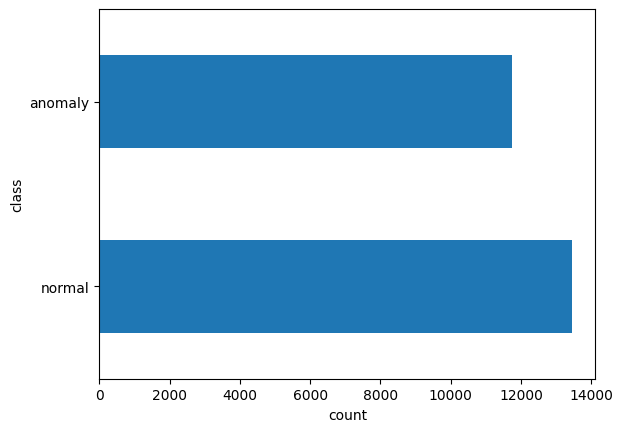

In [8]:
#check distribution of classes
dataset['class'].value_counts().plot(kind='barh', xlabel='count', ylabel='class')


In [9]:
# data preprocessing
try:
  dataset.drop(['num_outbound_cmds'], axis=1, inplace=True) #remove redundant feature column
except:
  print("column already dropped!")
  pass

# sacle the numerical values to zero mean and unit variance
scaler = StandardScaler()
numerical_cols = dataset.select_dtypes(include=['float64','int64']).columns # select only numerical feature columns

df_std = scaler.fit_transform(dataset.select_dtypes(include=['float64','int64']))
df_std = pd.DataFrame(df_std, columns = numerical_cols)
df_std

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.976667,-1.091006,-0.120406,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.833807,-0.687453,1.069663,-0.440940,2.764775,1.339894,-0.641804,-0.627365,-0.385140,-0.374281
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.922440,-1.046456,-0.066984,-0.478183,-0.287993,-0.641804,-0.627365,2.884296,2.777041
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.859174,-0.979631,-0.120406,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281


In [10]:
# we encode the non-numerical columns 
encoder = LabelEncoder()
non_numerical = dataset.select_dtypes(include=['object']).copy()
encoding = non_numerical.apply(encoder.fit_transform)
#print(encoding)
df_encoded = encoding.drop(columns = ['class'])
X = pd.concat([df_std, df_encoded],axis = 1)  #concat two dataframes to form the datafrom for features, with all columns numericalized
y = encoding['class']
print(X.shape, y.shape)

# split dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.80, random_state=0)


(25192, 40) (25192,)


In [11]:
# RQ1: How do different ML algorithms perform when detecting network anomalies in terms of detection accuracy and running time efficiency?


from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import tree


def evaluate_models(x_train,y_train, x_test, y_test):
   # model 1: KNN
   KNN = KNeighborsClassifier()
   KNN.fit(x_train, y_train)

   #evalute on training set
   model_accuracy = []
   model_name = []
   model_time = []
   scores = cross_val_score(KNN, x_train, y_train, cv=10)
   accuracy = metrics.accuracy_score(y_train, KNN.predict(x_train))
   f1_report = metrics.classification_report(y_train, KNN.predict(x_train))
   print("############################Evaluating KNN on training set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   #evalute on testing set
   start_t = time.time()
   scores = cross_val_score(KNN, x_test, y_test, cv=10)
   accuracy = metrics.accuracy_score(y_test, KNN.predict(x_test))
   f1_report = metrics.classification_report(y_test, KNN.predict(x_test))
   end_t = time.time()
   print("############################Evaluating KNN on testing set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   # store results
   model_name.append("K-Nearest-Neighbour")
   model_time.append(end_t - start_t)
   model_accuracy.append(accuracy)



   # model 2: Logistic Regression
   logis_reg = LogisticRegression()
   logis_reg.fit(x_train, y_train)

   #evalute on training set
   scores = cross_val_score(logis_reg, x_train, y_train, cv=10)
   accuracy = metrics.accuracy_score(y_train, logis_reg.predict(x_train))
   f1_report = metrics.classification_report(y_train, logis_reg.predict(x_train))
   print("############################Evaluating Logistic Regression on training set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   #evalute on testing set
   start_t = time.time()
   scores = cross_val_score(logis_reg, x_test, y_test, cv=10)
   accuracy = metrics.accuracy_score(y_test, logis_reg.predict(x_test))
   f1_report = metrics.classification_report(y_test, logis_reg.predict(x_test))
   end_t = time.time()
   print("############################Evaluating Logistic Regression on testing set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   # store results
   model_name.append("Logistic Regression")
   model_time.append(end_t - start_t)
   model_accuracy.append(accuracy)

   # model 3: Decision Tree
   decision_tree = tree.DecisionTreeClassifier()
   decision_tree.fit(x_train, y_train)

   #evalute on training set
   scores = cross_val_score(decision_tree, x_train, y_train, cv=10)
   accuracy = metrics.accuracy_score(y_train, decision_tree.predict(x_train))
   f1_report = metrics.classification_report(y_train, decision_tree.predict(x_train))
   print("############################Evaluating Decision Tree on training set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   #evalute on testing set
   start_t = time.time()
   scores = cross_val_score(decision_tree, x_test, y_test, cv=10)
   accuracy = metrics.accuracy_score(y_test, decision_tree.predict(x_test))
   f1_report = metrics.classification_report(y_test, decision_tree.predict(x_test))
   end_t = time.time()
   print("############################Evaluating Decision Tree on testing set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   # store results
   model_name.append("Decision Tree")
   model_time.append(end_t - start_t)
   model_accuracy.append(accuracy)


   # model 4: Support Vector machine
   svc = SVC()
   svc.fit(x_train, y_train)

   #evalute on training set
   scores = cross_val_score(svc, x_train, y_train, cv=10)
   accuracy = metrics.accuracy_score(y_train, svc.predict(x_train))
   f1_report = metrics.classification_report(y_train, svc.predict(x_train))
   print("############################Evaluating Support Vector Machine on training set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   #evalute on testing set
   start_t = time.time()
   scores = cross_val_score(svc, x_test, y_test, cv=10)
   accuracy = metrics.accuracy_score(y_test, svc.predict(x_test))
   f1_report = metrics.classification_report(y_test, svc.predict(x_test))
   end_t = time.time()
   print("############################Evaluating Support Vector Machine on testing set######################")
   print ("Cross Validation Mean Score:" "\n", scores.mean())
   print()
   print ("Model Accuracy:" "\n", accuracy)
   print()
   print("Classification report:" "\n", f1_report)
   # store results
   model_name.append("Support Vector Machine")
   model_time.append(end_t - start_t)
   model_accuracy.append(accuracy)
   return model_name, model_accuracy, model_time
model_name, model_accuracy, model_time = evaluate_models(x_train, y_train, x_test, y_test)

############################Evaluating KNN on training set######################
Cross Validation Mean Score:
 0.9924578065303873

Model Accuracy:
 0.9944921351659802

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      9417
           1       0.99      1.00      0.99     10736

    accuracy                           0.99     20153
   macro avg       0.99      0.99      0.99     20153
weighted avg       0.99      0.99      0.99     20153

############################Evaluating KNN on testing set######################
Cross Validation Mean Score:
 0.9886881094386064

Model Accuracy:
 0.9916650128993848

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2326
           1       0.99      0.99      0.99      2713

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg      

In [12]:
performance_full_feature = pd.DataFrame({'Model': model_name, 'Prediction Accuracy': model_accuracy, 'Running time (s)': model_time})
print("Model performace with full feature:")
performance_full_feature

Model performace with full feature:


,Model,Prediction Accuracy,Running time (s)
0,K-Nearest-Neighbour,0.991665,4.783404
1,Logistic Regression,0.955944,6.208291
2,Decision Tree,0.995833,0.813870
3,Support Vector Machine,0.965866,6.106684


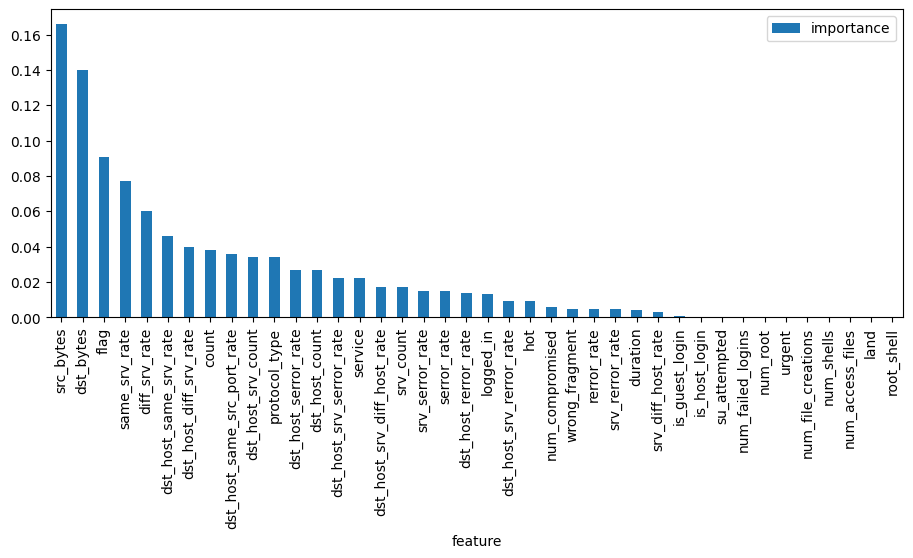

In [13]:
# RQ2: Is there a trade-off between the number of features and accuracy as well as running time?
 # use a random forest to find importances of all features

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, y)
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


In [14]:
# select top 3 features
top_3_feature = list(importances.index)[0:3]
x_train_3 = x_train[top_3_feature]
x_test_3 = x_test[top_3_feature]
model_name, model_accuracy, model_time = evaluate_models(x_train_3, y_train, x_test_3, y_test)
performance_3_feature = pd.DataFrame({'Model': model_name, 'Prediction Accuracy': model_accuracy, 'Running time (s)': model_time})
print("Model performace with 3 feature:")
performance_3_feature

############################Evaluating KNN on training set######################
Cross Validation Mean Score:
 0.9571262653117492

Model Accuracy:
 0.9726095370416316

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      9417
           1       1.00      0.95      0.97     10736

    accuracy                           0.97     20153
   macro avg       0.97      0.97      0.97     20153
weighted avg       0.97      0.97      0.97     20153

############################Evaluating KNN on testing set######################
Cross Validation Mean Score:
 0.9448231247436019

Model Accuracy:
 0.9662631474498908

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      2326
           1       0.99      0.94      0.97      2713

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg      

,Model,Prediction Accuracy,Running time (s)
0,K-Nearest-Neighbour,0.966263,1.755179
1,Logistic Regression,0.877952,0.717013
2,Decision Tree,0.968248,0.307873
3,Support Vector Machine,0.878547,8.027986


In [15]:
# select top 5 features
top_5_feature = list(importances.index)[0:5]
x_train_5 = x_train[top_5_feature]
x_test_5 = x_test[top_5_feature]
model_name, model_accuracy, model_time = evaluate_models(x_train_5, y_train, x_test_5, y_test)
performance_5_feature = pd.DataFrame({'Model': model_name, 'Prediction Accuracy': model_accuracy, 'Running time (s)': model_time})
print("Model performace with 5 feature:")
performance_5_feature

############################Evaluating KNN on training set######################
Cross Validation Mean Score:
 0.9813429044074204

Model Accuracy:
 0.9852131196347939

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      9417
           1       0.98      0.99      0.99     10736

    accuracy                           0.99     20153
   macro avg       0.99      0.98      0.99     20153
weighted avg       0.99      0.99      0.99     20153

############################Evaluating KNN on testing set######################
Cross Validation Mean Score:
 0.9751932847360282

Model Accuracy:
 0.980353244691407

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2326
           1       0.97      0.99      0.98      2713

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       

,Model,Prediction Accuracy,Running time (s)
0,K-Nearest-Neighbour,0.980353,0.789388
1,Logistic Regression,0.854535,0.373275
2,Decision Tree,0.988490,0.135864
3,Support Vector Machine,0.898194,5.561142


In [16]:
# select top 10 features
top_10_feature = list(importances.index)[0:10]
x_train_10 = x_train[top_10_feature]
x_test_10 = x_test[top_10_feature]
model_name, model_accuracy, model_time = evaluate_models(x_train_10, y_train, x_test_10, y_test)
performance_10_feature = pd.DataFrame({'Model': model_name, 'Prediction Accuracy': model_accuracy, 'Running time (s)': model_time})
print("Model performace with 10 feature:")
performance_10_feature

############################Evaluating KNN on training set######################
Cross Validation Mean Score:
 0.9769759787703336

Model Accuracy:
 0.9833771646901206

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      9417
           1       0.99      0.98      0.98     10736

    accuracy                           0.98     20153
   macro avg       0.98      0.98      0.98     20153
weighted avg       0.98      0.98      0.98     20153

############################Evaluating KNN on testing set######################
Cross Validation Mean Score:
 0.9660623560225945

Model Accuracy:
 0.9787656281008137

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2326
           1       0.98      0.98      0.98      2713

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg      

,Model,Prediction Accuracy,Running time (s)
0,K-Nearest-Neighbour,0.978766,1.675921
1,Logistic Regression,0.915856,0.487569
2,Decision Tree,0.992657,0.223672
3,Support Vector Machine,0.952173,4.382688


In [17]:
# select top 20 features
top_20_feature = list(importances.index)[0:20]
x_train_20 = x_train[top_20_feature]
x_test_20 = x_test[top_20_feature]
model_name, model_accuracy, model_time = evaluate_models(x_train_20, y_train, x_test_20, y_test)
performance_20_feature = pd.DataFrame({'Model': model_name, 'Prediction Accuracy': model_accuracy, 'Running time (s)': model_time})
print("Model performace with 20 feature:")
performance_20_feature

############################Evaluating KNN on training set######################
Cross Validation Mean Score:
 0.9898776044743786

Model Accuracy:
 0.9929539026447676

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      9417
           1       0.99      0.99      0.99     10736

    accuracy                           0.99     20153
   macro avg       0.99      0.99      0.99     20153
weighted avg       0.99      0.99      0.99     20153

############################Evaluating KNN on testing set######################
Cross Validation Mean Score:
 0.9831317649657609

Model Accuracy:
 0.990672752530264

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2326
           1       0.99      0.99      0.99      2713

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       

,Model,Prediction Accuracy,Running time (s)
0,K-Nearest-Neighbour,0.990673,7.743360
1,Logistic Regression,0.945823,3.911145
2,Decision Tree,0.995039,0.505338
3,Support Vector Machine,0.959317,5.800884


In [18]:
performance_full_feature, performance_3_feature, performance_5_feature, performance_10_feature, performance_20_feature

(                    Model  Prediction Accuracy  Running time (s)
 0     K-Nearest-Neighbour             0.991665          4.783404
 1     Logistic Regression             0.955944          6.208291
 2           Decision Tree             0.995833          0.813870
 3  Support Vector Machine             0.965866          6.106684,
                     Model  Prediction Accuracy  Running time (s)
 0     K-Nearest-Neighbour             0.966263          1.755179
 1     Logistic Regression             0.877952          0.717013
 2           Decision Tree             0.968248          0.307873
 3  Support Vector Machine             0.878547          8.027986,
                     Model  Prediction Accuracy  Running time (s)
 0     K-Nearest-Neighbour             0.980353          0.789388
 1     Logistic Regression             0.854535          0.373275
 2           Decision Tree             0.988490          0.135864
 3  Support Vector Machine             0.898194          5.561142,
       

In [19]:
#RQ3: How and why did my machine learning model predict a network activity as an anomaly?
 
# select for each type of model, what is the best #feature
top_2_feature = list(importances.index)[0:2]
x_train_2 = x_train[top_2_feature]
KNN = KNeighborsClassifier()
KNN.fit(x_train_2, y_train)
logis_reg = LogisticRegression()
logis_reg.fit(x_train, y_train)
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_train_10, y_train)
svc = SVC(kernel='linear')
svc.fit(x_train_2, y_train)


SVC(kernel='linear')

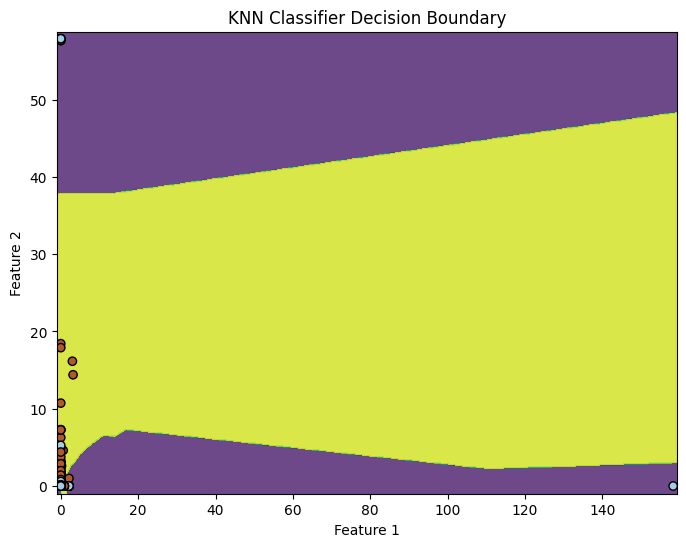

In [20]:

# Interpret KNN
X_array = X[top_2_feature].values
h = 0.1  # Step size in the mesh
x_min, x_max = X_array[:, 0].min() - 1, X_array[:, 0].max() + 1
y_min, y_max = X_array[:, 1].min() - 1, X_array[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for the meshgrid points using the trained KNN model
Z =  KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize the decision boundary using a contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_array[:, 0], X_array[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier Decision Boundary')
plt.show()




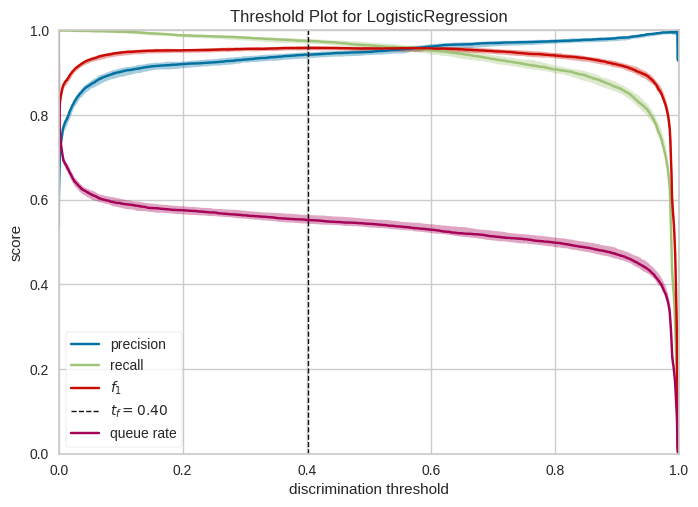

In [21]:
#Interpret Logistic Regression
from yellowbrick.classifier import discrimination_threshold
visualizer = discrimination_threshold(LogisticRegression(multi_class="auto", solver="liblinear"), X,y)
import eli5
eli5.show_weights(logis_reg, feature_names = list(X.columns),target_names = ['1','0'])

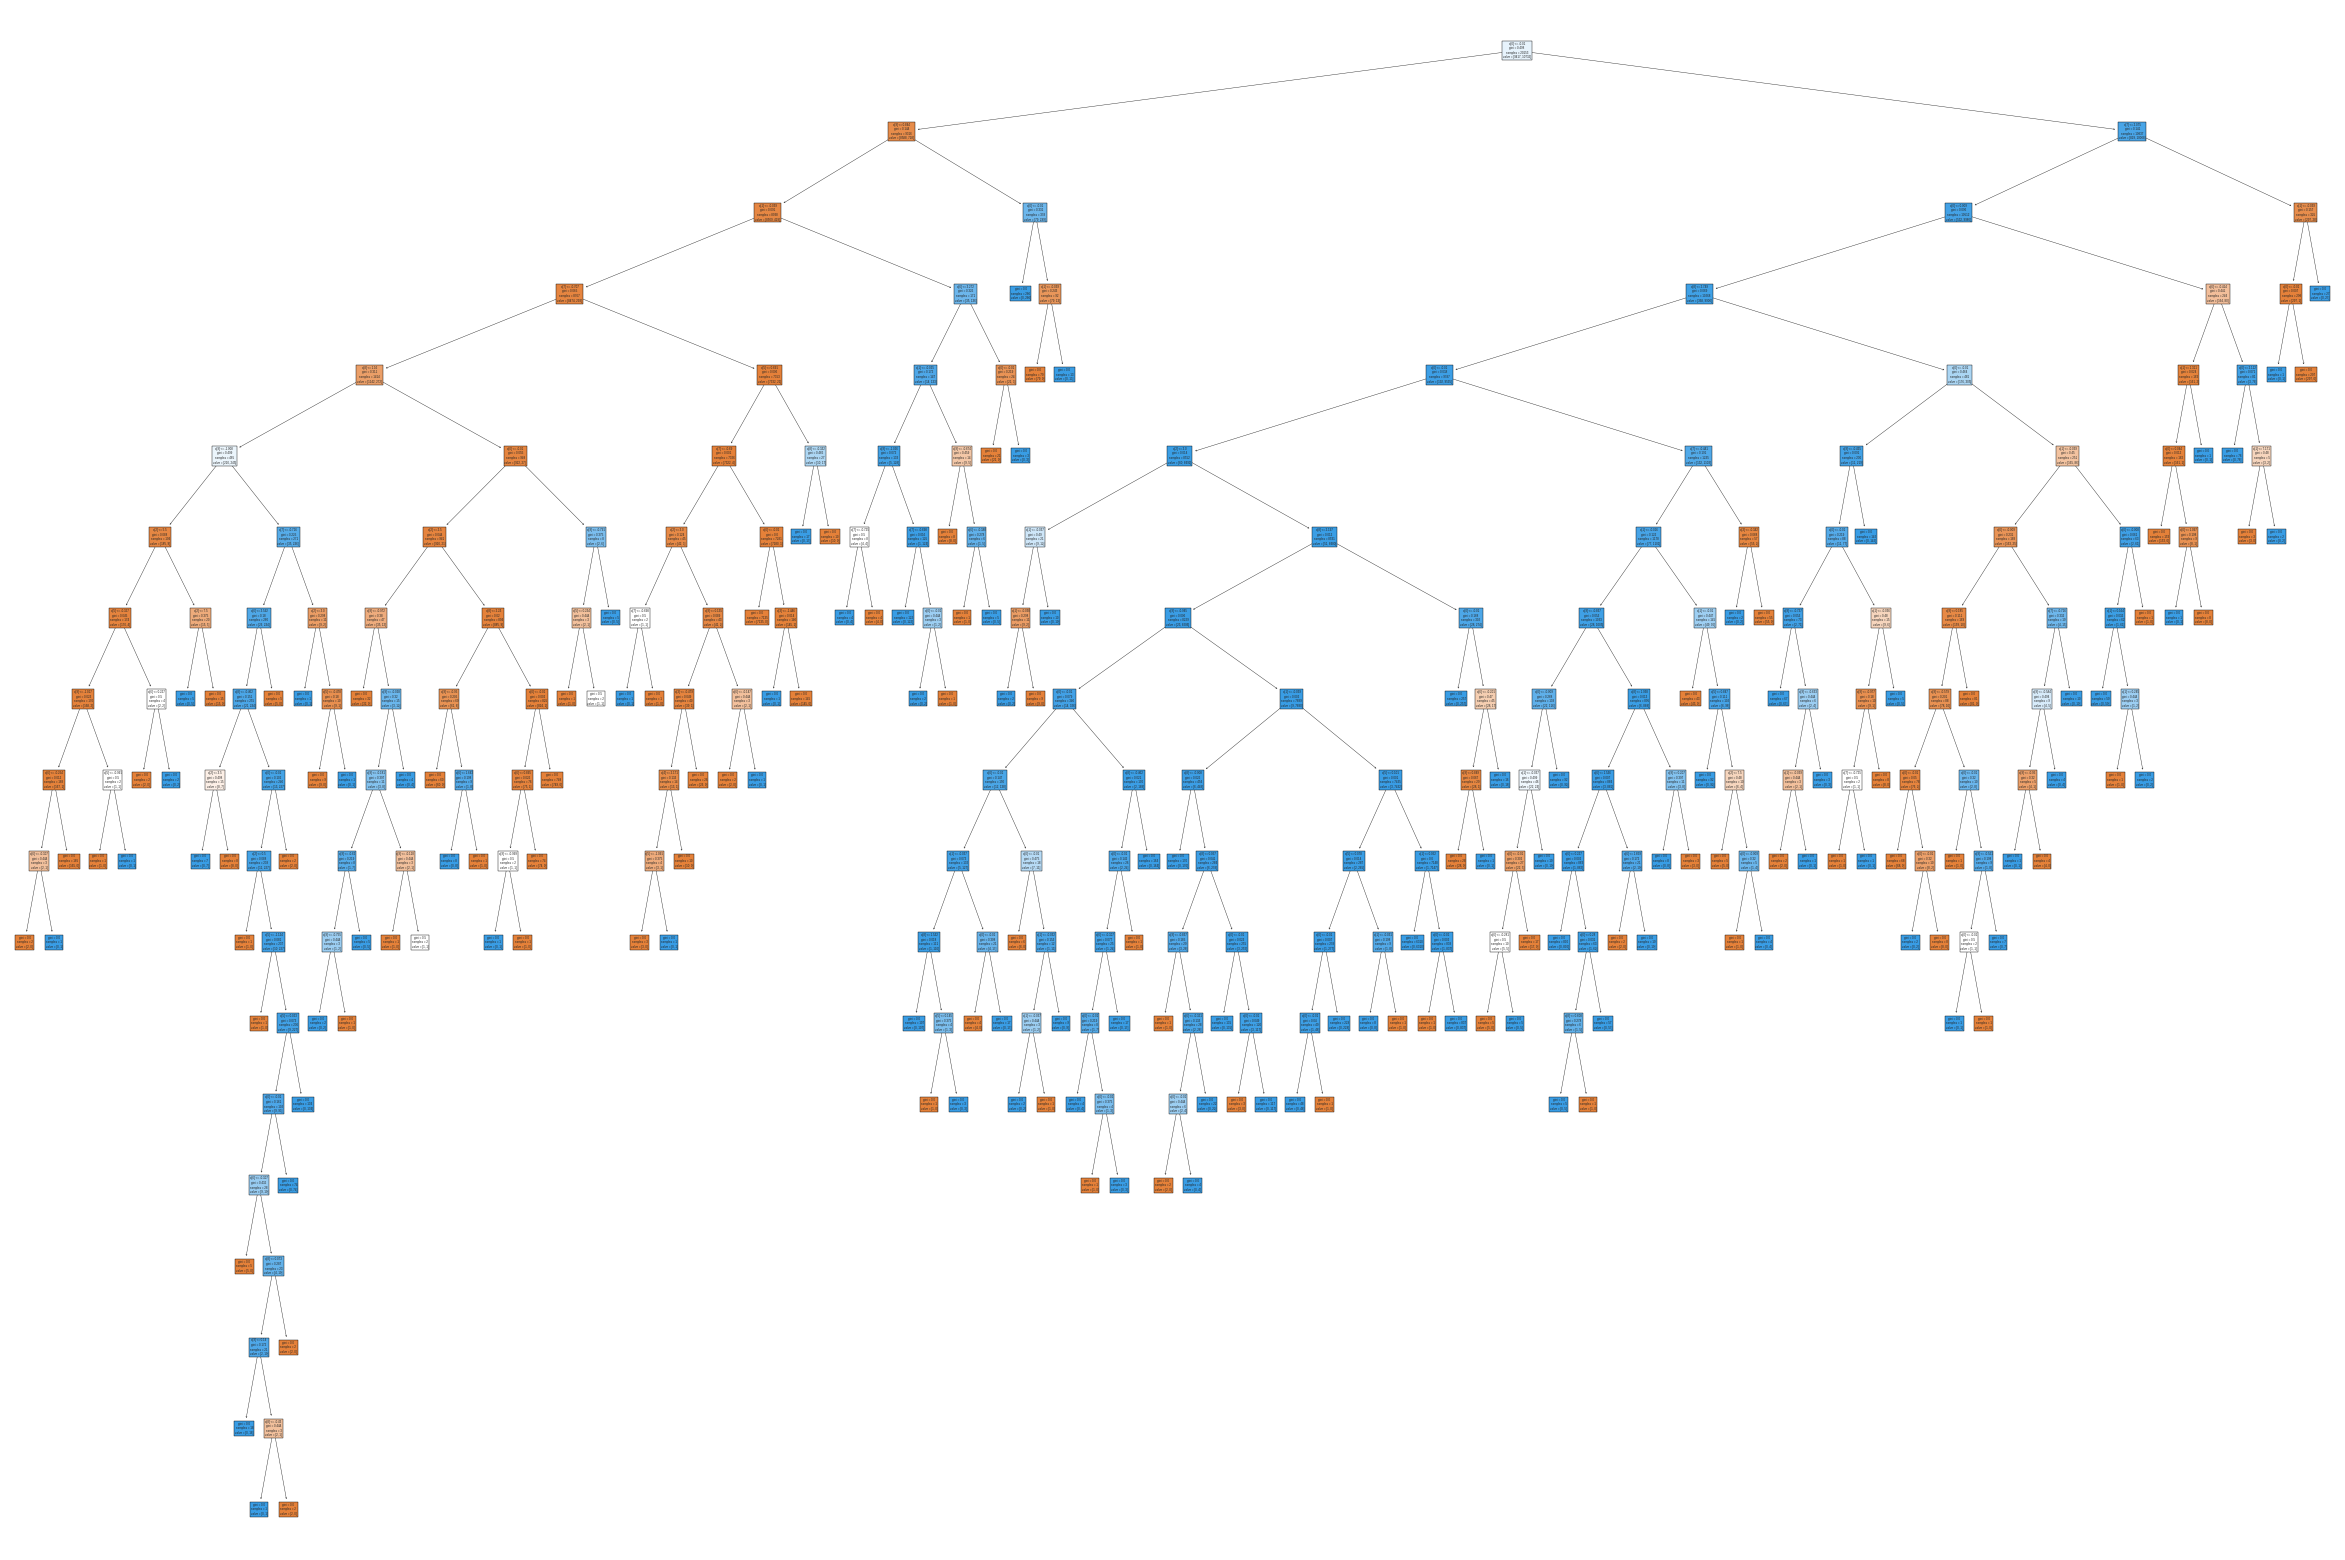

Feature importances:
src_bytes: 0.7689444279563821
count: 0.06607440680646662
dst_host_srv_count: 0.06328113585047847
dst_bytes: 0.046115057272931255
dst_host_same_src_port_rate: 0.02983908518770974
dst_host_diff_srv_rate: 0.017570994134665632
dst_host_same_srv_rate: 0.003863299381244308
flag: 0.0036839651080887215
same_srv_rate: 0.00059202558163804
diff_srv_rate: 3.560272039508533e-05


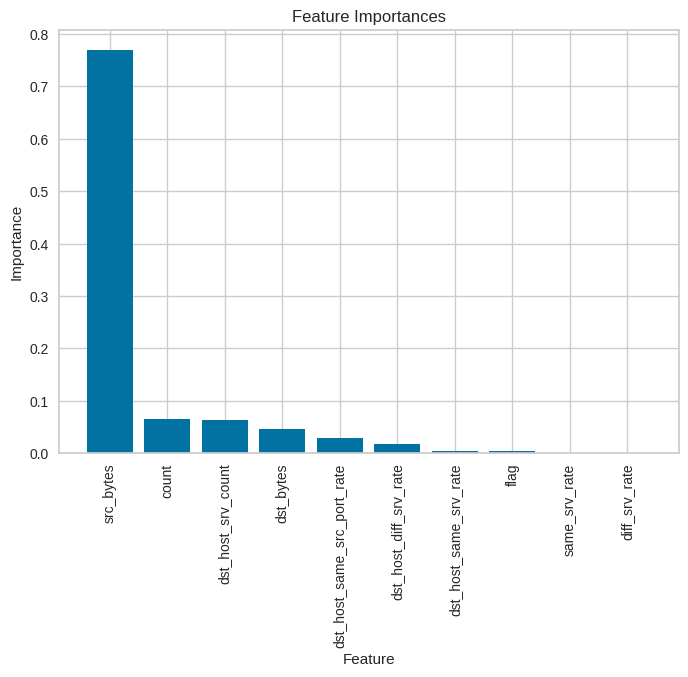

Weight,Feature
0.7689,src_bytes
0.0661,count
0.0633,dst_host_srv_count
0.0461,dst_bytes
0.0298,dst_host_same_src_port_rate
0.0176,dst_host_diff_srv_rate
0.0039,dst_host_same_srv_rate
0.0037,flag
0.0006,same_srv_rate
0.0000,diff_srv_rate


In [22]:
#interpret Decision Tree
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(decision_tree, filled=True, ax=ax)
plt.show()

# Calculate feature importances
importances = decision_tree.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for idx in sorted_idx:
    print(f"{x_train_10.columns[idx]}: {importances[idx]}")

# Visualize feature importances
plt.bar(range(x_train_10.shape[1]), importances[sorted_idx])
plt.xticks(range(x_train_10.shape[1]), x_train_10.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()
eli5.show_weights(decision_tree, feature_names = list(x_train_10.columns),target_names = ['1','0'])

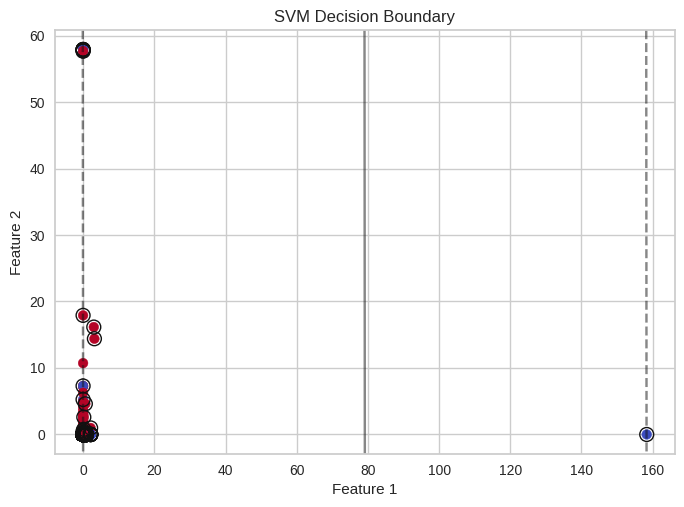

Weights (w): [-1.26356229e-02 -1.84124809e-05]
Intercept (b): 0.9999101953653432
Support Vectors: [[-0.00966444 -0.03930979]
 [-0.00995398 -0.03930979]
 [-0.01009252 -0.03930979]
 ...
 [-0.01008008 -0.03930979]
 [-0.009596   -0.03359093]
 [-0.00999629 -0.03415381]]


In [23]:
# Interpret SVC 
# Visualize the decision boundary
# Only consider the first two features for visualization
# Extract model parameters
w = svc.coef_[0]  # Weights
b = svc.intercept_[0]  # Intercept
support_vectors = svc.support_vectors_  # Support vectors

# Visualize decision boundary
plt.scatter(x_train_2.values[:, 0], x_train_2.values[:, 1], c=y_train, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and support vectors
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

# Interpretation
print("Weights (w):", w)
print("Intercept (b):", b)
print("Support Vectors:", support_vectors)

In [24]:
# Cohen's Kappa
from sklearn.metrics import cohen_kappa_score

rate1 = [2,3,4,2]
rate2 = [2,4,4,1]

kappa = cohen_kappa_score(rate1, rate2)
print("Cohen's kappa coefficient:", kappa)


Cohen's kappa coefficient: 0.33333333333333337
